# NetCDF files can handle weather variables

In [1]:
import xarray as xr

In [6]:
# load a netcdf file
file_path = r'C:\Users\Shubham\Desktop\PandasTutorial\PERCDR_0.25deg_2001_2010_precipitation_data.nc'
ds = xr.open_dataset(file_path)

In [52]:
# extract the information
print(ds)

<xarray.Dataset>
Dimensions:   (datetime: 3652, lon: 16, lat: 13)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
  * lon       (lon) float32 77.0 77.25 77.5 77.75 78.0 ... 80.0 80.25 80.5 80.75
  * lat       (lat) float32 31.5 31.25 31.0 30.75 30.5 ... 29.25 29.0 28.75 28.5
Data variables:
    crs       int32 ...
    precip    (datetime, lat, lon) float32 4.0 4.5 4.08 4.14 ... 0.0 0.0 0.0 0.0
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    history:      Wed Jan 10 11:36:35 2024: cdo mergetime CDR_2024-01-0808503...
    Conventions:  CF-1.6
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...


In [53]:
# extract variable (column) names variables
list(ds.variables)

['datetime', 'lon', 'lat', 'crs', 'precip']

In [54]:
# extract all dimensions (axis), (time, lon, lat)
list(ds.dims)

['datetime', 'lon', 'lat']

In [55]:
# extract precipitation value, be aware of the variable names
precipitation = ds['precip']

In [56]:
# you can retrieve actual precipitation values using .values
precipitation.values

array([[[ 4.  ,  4.5 ,  4.08, ...,  0.98,  0.7 ,  0.76],
        [ 5.91,  5.34,  4.23, ...,  2.07,  1.72,  1.67],
        [ 4.48,  4.68,  4.89, ...,  3.1 ,  2.67,  1.84],
        ...,
        [ 2.75,  2.02,  3.1 , ...,  0.  ,  0.  ,  1.56],
        [ 5.14,  3.33,  5.7 , ...,  0.  ,  0.  ,  0.  ],
        [ 7.87,  4.16,  2.23, ...,  2.77,  0.  ,  0.  ]],

       [[ 0.33,  0.4 ,  0.94, ...,  1.96,  1.06,  0.69],
        [ 0.36,  0.45,  1.02, ...,  1.86,  1.2 ,  1.09],
        [ 0.39,  0.88,  1.57, ...,  1.91,  2.42,  2.6 ],
        ...,
        [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]],

       [[ 0.  ,  0.  ,  0.  , ...,  0.31,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  , ...,  0.41,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  , ...,  0.4 ,  0.72,  0.28],
        ...,
        [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.

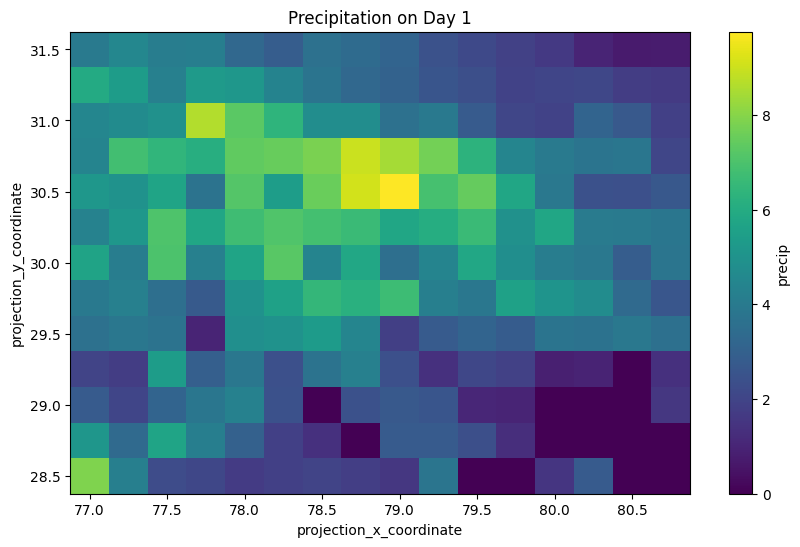

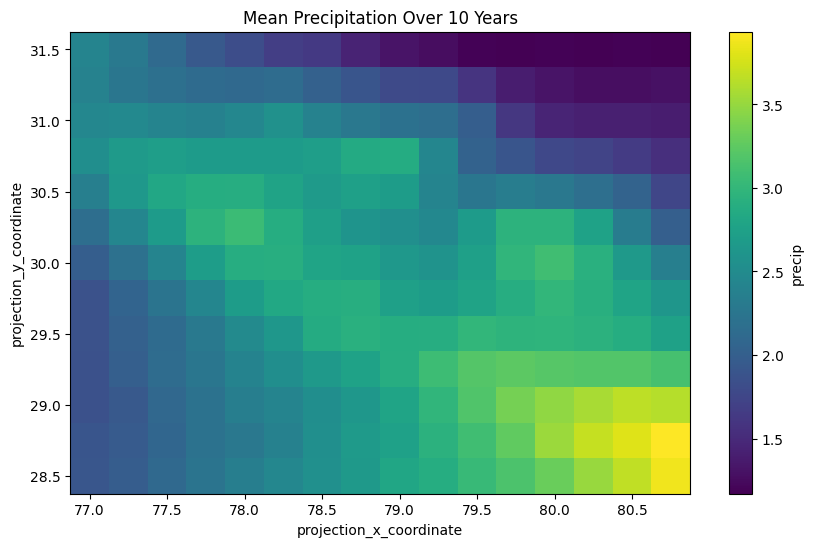

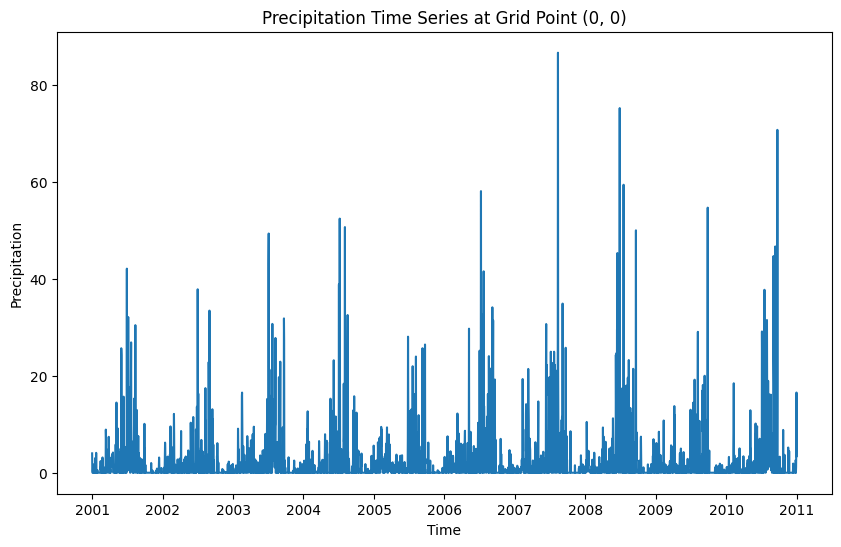

In [57]:
# Here i have plotte for visualizing the data
import matplotlib.pyplot as plt

# Plotting the first day of precipitation data
plt.figure(figsize=(10, 6))
precipitation.isel(datetime=0).plot(cmap='viridis')
plt.title('Precipitation on Day 1')
plt.show()

# Compute the mean precipitation over time for each grid point
mean_precipitation = precipitation.mean(dim='datetime')

# Plot the mean precipitation data
plt.figure(figsize=(10, 6))
mean_precipitation.plot(cmap='viridis')
plt.title('Mean Precipitation Over 10 Years')
plt.show()

# Time series of precipitation at a specific grid point (e.g., at coordinates (0, 0))
time_series = precipitation[:, 0, 0]

plt.figure(figsize=(10, 6))
time_series.plot()
plt.title('Precipitation Time Series at Grid Point (0, 0)')
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.show()

In [60]:
# Indexing by position, be aware of difference between .isel (similar to .iloc) and .sel (similar to .loc in pandas), here i have extracted day 1 data using normal 0 to n indexing
first_time_point = precipitation.isel(datetime=0)
print("First time point data:\n", first_time_point)

# Here i have extracted data at a unique point represented by unique lat lon index (lon[5], lat[10])
specific_point = precipitation.isel(lat=10, lon=5)
print("Specific grid point data:\n", specific_point)

First time point data:
 <xarray.DataArray 'precip' (lat: 13, lon: 16)>
array([[4.  , 4.5 , 4.08, ..., 0.98, 0.7 , 0.76],
       [5.91, 5.34, 4.23, ..., 2.07, 1.72, 1.67],
       [4.48, 4.68, 4.89, ..., 3.1 , 2.67, 1.84],
       ...,
       [2.75, 2.02, 3.1 , ..., 0.  , 0.  , 1.56],
       [5.14, 3.33, 5.7 , ..., 0.  , 0.  , 0.  ],
       [7.87, 4.16, 2.23, ..., 2.77, 0.  , 0.  ]], dtype=float32)
Coordinates:
    datetime  datetime64[ns] 2001-01-01
  * lon       (lon) float32 77.0 77.25 77.5 77.75 78.0 ... 80.0 80.25 80.5 80.75
  * lat       (lat) float32 31.5 31.25 31.0 30.75 30.5 ... 29.25 29.0 28.75 28.5
Attributes:
    grid_mapping:  crs
Specific grid point data:
 <xarray.DataArray 'precip' (datetime: 3652)>
array([2.42, 0.  , 0.  , ..., 0.  , 1.7 , 0.  ], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
    lon       float32 78.25
    lat       float32 29.0
Attributes:
    grid_mapping:  crs


In [61]:
# Let us extract latitude and longitude data also
latitude = ds['lat']
longitude = ds['lon']

In [62]:
# Slicing by position, you just need to define the slice range by index position
# Here I tried to extract all grid data for first 10 days 
first_10_days = precipitation.isel(datetime=slice(0, 10))
print("First 10 days data:\n", first_10_days.shape)

# Here we extract all day data for a subsection using spatial slicing 
spatial_slice = precipitation.isel(lat=slice(2, 6), lon=slice(5, 12))
print("Spatial slice data:\n", spatial_slice)

First 10 days data:
 (10, 13, 16)
Spatial slice data:
 <xarray.DataArray 'precip' (datetime: 3652, lat: 4, lon: 7)>
array([[[ 6.33,  4.74, ...,  2.78,  2.03],
        [ 7.48,  7.81, ...,  6.26,  4.46],
        [ 5.41,  7.52, ...,  7.44,  5.79],
        [ 7.06,  6.86, ...,  6.61,  4.9 ]],

       [[ 0.62,  0.79, ...,  2.99,  2.83],
        [ 1.09,  2.66, ...,  1.36,  3.05],
        [ 2.5 ,  2.57, ...,  2.8 ,  3.69],
        [ 3.33,  1.34, ...,  4.15,  5.8 ]],

       ...,

       [[16.17, 13.43, ...,  6.32,  6.03],
        [13.57, 13.17, ...,  7.89,  8.64],
        [11.5 , 10.11, ..., 10.72,  7.2 ],
        [ 7.38,  5.  , ...,  8.33,  5.59]],

       [[ 6.82,  7.49, ...,  4.2 ,  5.04],
        [ 5.32,  5.33, ...,  7.04,  6.21],
        [ 2.84,  5.71, ...,  8.81,  7.63],
        [ 3.  ,  5.32, ...,  9.33,  8.21]]], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
  * lon       (lon) float32 78.25 78.5 78.75 79.0 79.25 79.5 79.75
  *

In [63]:
# Selecting by coordinate labels, by using .sel (similar to .loc in pandas) we can extract data by actual variable values
specific_date = precipitation.sel(datetime= '2004-01-01')
print("Data for specific date (2010-01-01):\n", specific_date)

# Finding the nearest precipitation value to a desired point (29.2, 78.3) using nerest neighbour interpolation
specific_location = precipitation.sel(lat=78.3, lon=29.2, method='nearest')   
print("Data for specific location (lat=35.0, lon=-75.0):\n", specific_location) 

Data for specific date (2010-01-01):
 <xarray.DataArray 'precip' (lat: 13, lon: 16)>
array([[0.48, 1.05, 1.45, ..., 0.54, 0.79, 0.61],
       [0.85, 0.88, 0.94, ..., 0.29, 0.49, 0.42],
       [0.67, 0.61, 0.99, ..., 1.62, 0.87, 0.74],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)
Coordinates:
    datetime  datetime64[ns] 2004-01-01
  * lon       (lon) float32 77.0 77.25 77.5 77.75 78.0 ... 80.0 80.25 80.5 80.75
  * lat       (lat) float32 31.5 31.25 31.0 30.75 30.5 ... 29.25 29.0 28.75 28.5
Attributes:
    grid_mapping:  crs
Data for specific location (lat=35.0, lon=-75.0):
 <xarray.DataArray 'precip' (datetime: 3652)>
array([ 4.  ,  0.33,  0.  , ...,  5.  , 16.55,  3.41], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
    lon       float32 77.0
    lat       float32 31.5
Attributes:
    grid_mappin

In [40]:
# Slicing by coordinate range
date_range = precipitation.sel(datetime=slice('2010-01-01', '2010-12-31'))
print("Data for the year 2010:\n", date_range)

lat_lon_range = precipitation.sel(lat=slice(31.0, 29.0), lon=slice(78.0, 79.0)) # cropping the data with lat lon range
print("Data for lat range 31-29 and lon range 78 to 79:\n", lat_lon_range)

Data for the year 2010:
 <xarray.DataArray 'precip' (datetime: 365, lat: 13, lon: 16)>
array([[[ 0.  ,  0.  , ...,  0.  ,  0.  ],
        [ 0.  ,  0.  , ...,  0.  ,  0.  ],
        ...,
        [ 0.  ,  0.  , ...,  0.  ,  0.  ],
        [ 0.  ,  0.  , ...,  0.  ,  0.  ]],

       [[ 0.78,  0.53, ...,  0.  ,  0.  ],
        [ 0.52,  0.87, ...,  0.  ,  0.  ],
        ...,
        [ 0.  ,  0.  , ...,  0.  ,  0.  ],
        [ 0.  ,  0.  , ...,  0.  ,  0.  ]],

       ...,

       [[16.55, 18.58, ...,  3.11,  1.78],
        [18.33, 17.83, ...,  3.37,  3.2 ],
        ...,
        [ 0.  ,  0.  , ...,  0.89,  0.96],
        [ 0.  ,  0.  , ...,  1.13,  1.99]],

       [[ 3.41,  3.76, ...,  2.66,  2.12],
        [ 4.64,  3.73, ...,  2.68,  2.04],
        ...,
        [ 0.  ,  0.  , ...,  0.  ,  1.93],
        [ 0.  ,  0.  , ...,  0.  ,  0.  ]]], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-12-31
  * lon       (lon) float32 77.0 77.25 77.5 77.

In [64]:
# Boolean indexing, you can perform conditional extraction using boolean conditions
high_precipitation = precipitation.isel(lat=0, lon=0) > 15
high_precipitation_times = precipitation.datetime[high_precipitation]
print("Times with high precipitation at (0, 0):\n", high_precipitation_times)

Times with high precipitation at (0, 0):
 <xarray.DataArray 'datetime' (datetime: 132)>
array(['2001-06-01T00:00:00.000000000', '2001-06-02T00:00:00.000000000',
       '2001-06-13T00:00:00.000000000', '2001-06-30T00:00:00.000000000',
       '2001-07-02T00:00:00.000000000', '2001-07-03T00:00:00.000000000',
       '2001-07-07T00:00:00.000000000', '2001-07-11T00:00:00.000000000',
       '2001-07-16T00:00:00.000000000', '2001-07-21T00:00:00.000000000',
       '2001-07-22T00:00:00.000000000', '2001-08-08T00:00:00.000000000',
       '2001-08-13T00:00:00.000000000', '2002-07-02T00:00:00.000000000',
       '2002-07-03T00:00:00.000000000', '2002-07-05T00:00:00.000000000',
       '2002-08-11T00:00:00.000000000', '2002-08-28T00:00:00.000000000',
       '2002-09-01T00:00:00.000000000', '2002-09-02T00:00:00.000000000',
       '2003-02-16T00:00:00.000000000', '2003-02-17T00:00:00.000000000',
       '2003-06-27T00:00:00.000000000', '2003-07-04T00:00:00.000000000',
       '2003-07-05T00:00:00.00000000

In [65]:
high_precipitation[:]

<xarray.DataArray 'precip' (datetime: 3652)>
array([False, False, False, ..., False,  True, False])
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
    lon       float32 77.0
    lat       float32 31.5

In [66]:
# Indexing with arrays, you can just list all the indexes and pass into the isel command
indices = [0, 10, 20]
specific_times = precipitation.isel(datetime=indices)
print("Data for specific time indices (0, 10, 20):\n", specific_times)

Data for specific time indices (0, 10, 20):
 <xarray.DataArray 'precip' (datetime: 3, lat: 13, lon: 16)>
array([[[4.  , 4.5 , ..., 0.7 , 0.76],
        [5.91, 5.34, ..., 1.72, 1.67],
        ...,
        [5.14, 3.33, ..., 0.  , 0.  ],
        [7.87, 4.16, ..., 0.  , 0.  ]],

       [[0.25, 0.25, ..., 0.  , 0.  ],
        [0.  , 0.  , ..., 0.  , 0.16],
        ...,
        [0.  , 1.25, ..., 0.  , 0.  ],
        [0.  , 0.  , ..., 0.  , 0.  ]],

       [[0.  , 0.  , ..., 0.  , 0.  ],
        [0.  , 0.  , ..., 0.  , 0.  ],
        ...,
        [0.  , 0.  , ..., 0.  , 0.  ],
        [0.  , 0.  , ..., 0.  , 0.  ]]], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-11 2001-01-21
  * lon       (lon) float32 77.0 77.25 77.5 77.75 78.0 ... 80.0 80.25 80.5 80.75
  * lat       (lat) float32 31.5 31.25 31.0 30.75 30.5 ... 29.25 29.0 28.75 28.5
Attributes:
    grid_mapping:  crs


In [69]:
# Selecting data based on multiple conditions, drop=True will inser NaN at all empty places
threshold = 20
high_precip_data = precipitation.where(precipitation > threshold, drop=True)
print("Data with precipitation above threshold (20):\n", high_precip_data)

Data with precipitation above threshold (20):
 <xarray.DataArray 'precip' (datetime: 711, lat: 13, lon: 16)>
array([[[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan, 20.21],
        [  nan,   nan,   nan, ..., 21.73, 21.86, 22.62],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        ...,
        [  nan,   nan,   nan, ...,   nan, 20.3 , 22.37],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[  nan,   nan, 25.04, ...,   nan,   nan,   nan],
        [  nan,   nan, 25.17, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
      

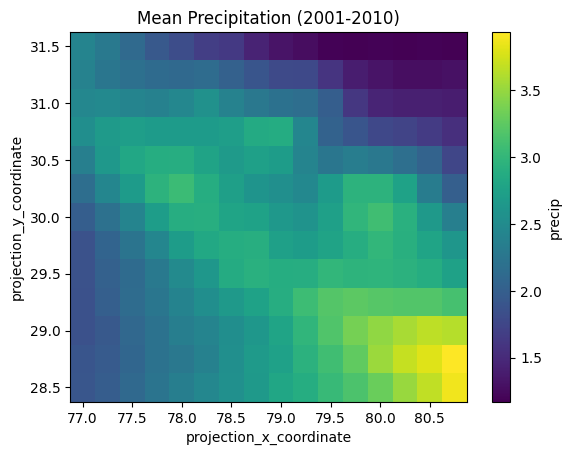

In [70]:
# the mean precipitation over time, as we saw in pands we used axis, here we use dim and specify it by name
mean_precip = precipitation.mean(dim='datetime')

# Plot
mean_precip.plot()
plt.title('Mean Precipitation (2001-2010)')
plt.show()

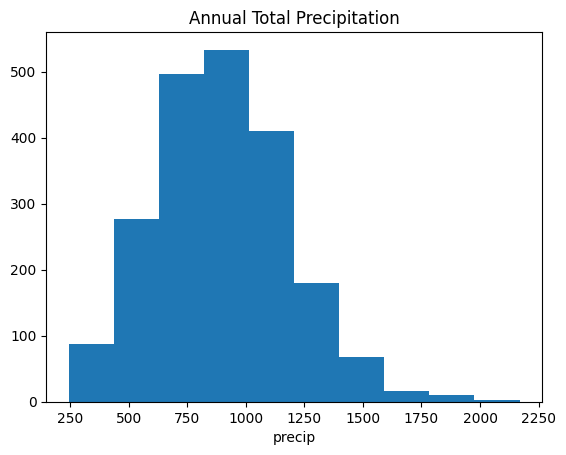

In [71]:
# Calculate the total precipitation for each year
annual_precip = precipitation.resample(datetime='1Y').sum() # similar to we saw resample in pandas
annual_precip.plot()
plt.title('Annual Total Precipitation')
plt.show()

In [72]:
import geopandas as gpd

In [73]:
# Load the Alakananda shape file (all sub-basins already concatenated as one)
shapefile_path = r"C:\Users\Shubham\Desktop\SanjeevSir_Project\Shapefile_alakananda\alak_shape_all_84.shp"
gdf = gpd.read_file(shapefile_path)

<AxesSubplot: >

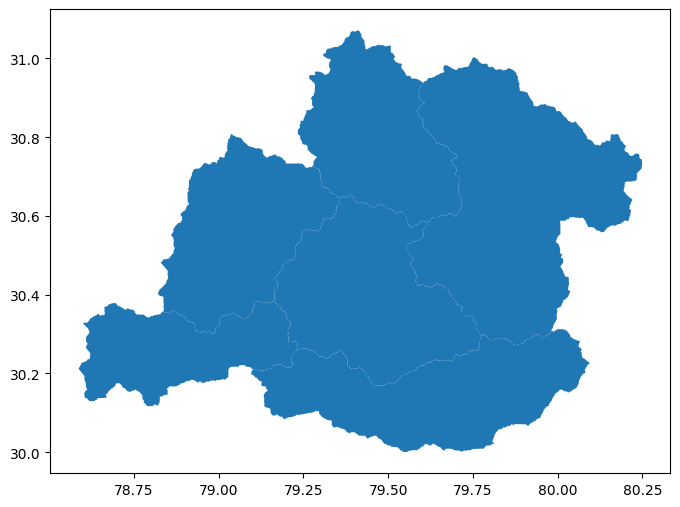

In [76]:
# Plot the shapefile
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the figure size as needed
gdf.plot(ax=ax)

In [77]:
# Check the CRS
print(gdf.crs)

EPSG:4326


In [78]:
# Calculating the bounding box
bounding_box = gdf.total_bounds
print(f"Bounding Box: {bounding_box}")

Bounding Box: [78.58733532 30.00003852 80.24941363 31.07195327]


In [79]:
# The bounding_box variable now contains [minx, miny, maxx, maxy]
minx, miny, maxx, maxy = bounding_box

In [114]:
# Increase the rectangle size to avoid errors
minx_new = minx - 0.04
miny_new = miny - 0.01
maxx_new = maxx + 0.06
maxy_new = maxy + 0.01

In [115]:
from shapely.geometry import box

# Create a new rectangle with the adjusted coordinates
rectangle_new = gpd.GeoSeries([box(minx_new, miny_new, maxx_new, maxy_new)], crs=gdf.crs)

<AxesSubplot: >

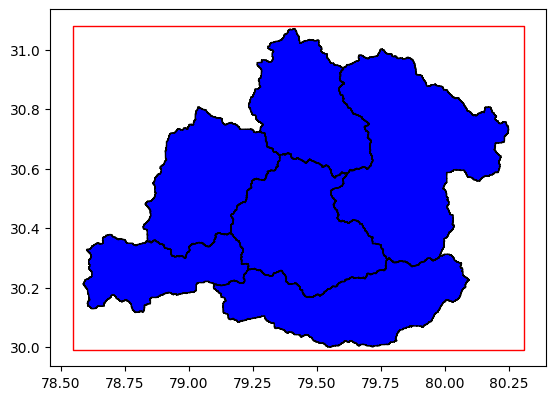

In [116]:
ax = gdf.plot(color='blue', edgecolor='k')
rectangle_new.plot(ax=ax, color='none', edgecolor='red')

In [117]:
# initialize an empty list to store x-values
x_values = []

# generate x-values
current_x = minx_new
increment = 0.25

while current_x <= maxx_new:
    x_values.append(current_x)  
    current_x += increment

# initialize an empty list to store y-values
y_values = []

# generate y-values
current_y = miny_new
increment = 0.25

while current_y <= maxy_new:
    y_values.append(current_y)  
    current_y += increment 

In [118]:
# print the size of x_values and y_values
print(f"The size of x_values is: {len(x_values)}")
print(f"The size of y_values is: {len(y_values)}")

The size of x_values is: 8
The size of y_values is: 5


In [119]:
import numpy as np

x_values = np.array(x_values, dtype=float)
y_values = np.array(y_values, dtype=float)

In [120]:
# function to calculate grid parameters
def calculate_grid_parameters(coord):
    d = np.diff(coord)[0] / 2
    cell_boundaries = np.concatenate([[coord[0] - d], coord + d])
    return cell_boundaries

# function to create grid cell taking arguments from x_values and y_values
def initialize_and_populate_grid(x_values, y_values):
    ngrid_cell = len(x_values) * len(y_values)
    grid_cell = [{} for _ in range(ngrid_cell)]
    
    dy = y_values[1] - y_values[0]
    k = 0
    
    loncell = calculate_grid_parameters(x_values)
    latcell = calculate_grid_parameters(y_values)
    
    for i, lon in enumerate(x_values):
        for j, lat in enumerate(y_values):
            x_coords = [loncell[i], loncell[i], loncell[i+1], loncell[i+1], loncell[i]]
            y_coords = [latcell[j], latcell[j+1], latcell[j+1], latcell[j], latcell[j]] if dy > 0 else \
                       [latcell[j+1], latcell[j], latcell[j], latcell[j+1], latcell[j+1]]
            
            grid_cell[k] = {'X': x_coords, 'Y': y_coords, 'Xc': lon, 'Yc': lat}
            k += 1
    return grid_cell

grid_cell = initialize_and_populate_grid(x_values, y_values)

In [121]:
# creating a geodataframe for grid cells as polygons
from shapely.geometry import Polygon
import geopandas as gpd

grid_cells = []

for cell in grid_cell:
    polygon = Polygon(list(zip(cell['X'], cell['Y'])))
    grid_cells.append(polygon)

grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=gdf.crs)

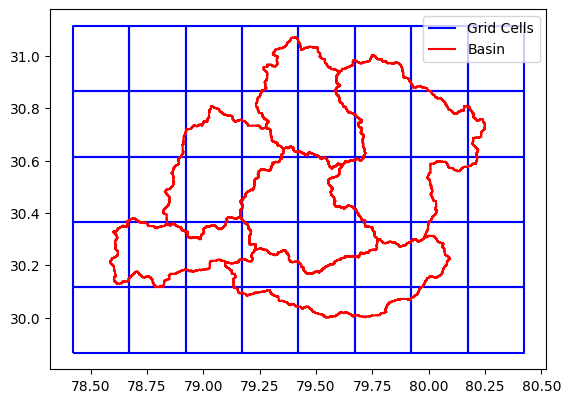

In [122]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
grid_gdf.boundary.plot(ax=ax, color='blue', label='Grid Cells')
gdf.boundary.plot(ax=ax, color='red', label='Basin')
plt.legend()
plt.show()

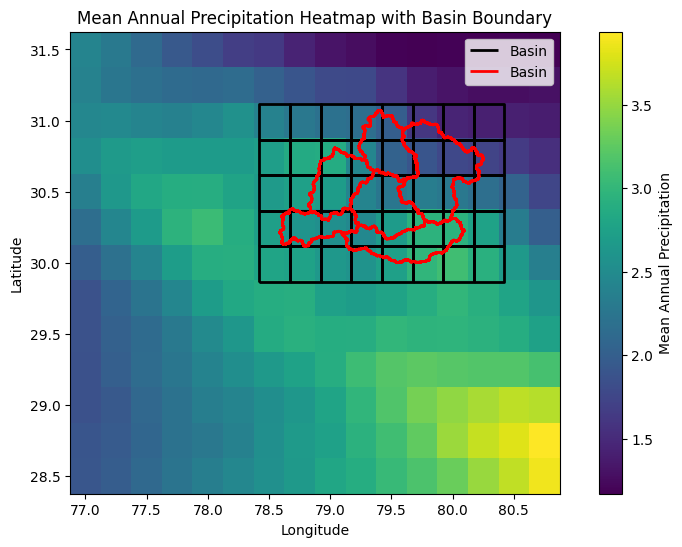

In [127]:
# Here I will plot our downloades data along with our grid, now we will have to bring this downloades data to our own grid
fig, ax = plt.subplots(figsize=(10, 6))

# Create the heatmap on the Axes object `ax`
c = ax.pcolormesh(longitude, latitude, mean_precip, shading='auto')

# Add the colorbar
fig.colorbar(c, ax=ax, label='Mean Annual Precipitation')

# Overlay the basin boundary and grid, make sure to specify the same Axes object `ax`
grid_gdf.boundary.plot(ax=ax, color='black', linewidth=2, label='Basin')
gdf.boundary.plot(ax=ax, color='red', linewidth=2, label='Basin')

# Add the legend
ax.legend()


# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Mean Annual Precipitation Heatmap with Basin Boundary')

# Display the plot
plt.show()